In [15]:
from os import getenv
from borsdata_sdk import BorsdataAPI
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.dpi'] = 200


api_key = getenv('BORSDATA_API_KEY')
bors_api = BorsdataAPI(api_key)


In [16]:
instruments = bors_api.get_instruments()

In [17]:
first = instruments[1]

first.__dict__

{'insId': 3,
 'name': 'ABB',
 'urlName': 'abb',
 'instrument': 0,
 'isin': 'CH0012221716',
 'ticker': 'ABB',
 'yahoo': 'ABB.ST',
 'sectorId': 5,
 'marketId': 1,
 'branchId': 23,
 'countryId': 1,
 'listingDate': '1999-06-22T00:00:00'}

In [18]:
abb_entries = bors_api.get_instrument_stock_price(3)

abb_entries[1].__dict__

{'i': None,
 'd': '2009-05-19',
 'h': 119.0911,
 'l': 116.6557,
 'c': 118.3604,
 'o': 116.8992,
 'v': 3179401}

In [19]:
abb_pd = pd.DataFrame([entry.__dict__ for entry in abb_entries]).set_index('d')
abb_pd.head()


,c,h,i,l,o,v
d,,,,,,
2009-05-18,116.4121,117.3863,None,112.5155,114.9509,3355810
2009-05-19,118.3604,119.0911,None,116.6557,116.8992,3179401
2009-05-20,120.5523,120.5523,None,117.3863,118.3604,2398434
2009-05-22,117.8734,118.6040,None,115.4380,117.1427,3136615
2009-05-25,117.1427,117.8734,None,115.9250,117.3863,1264281


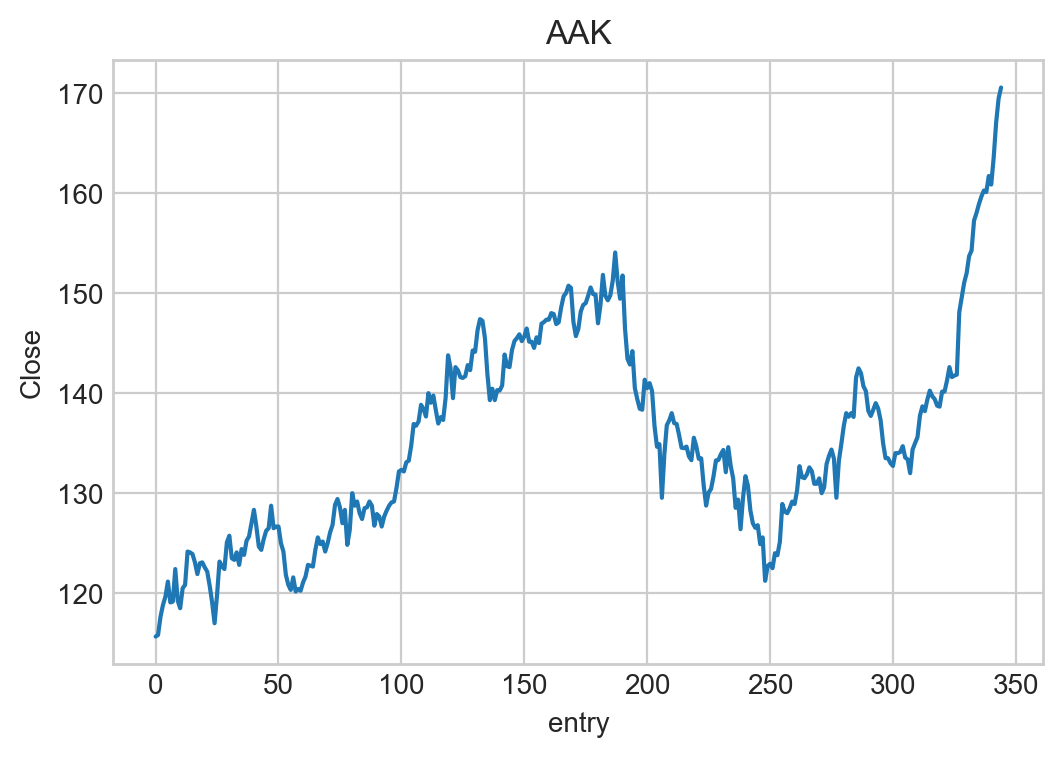

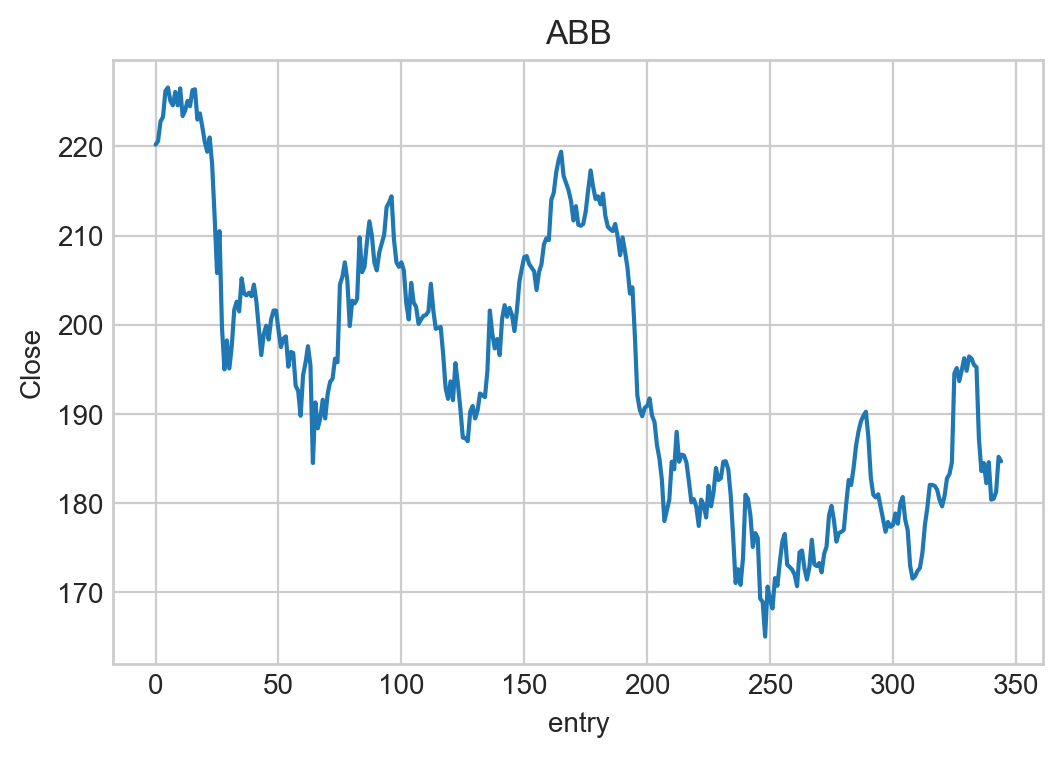

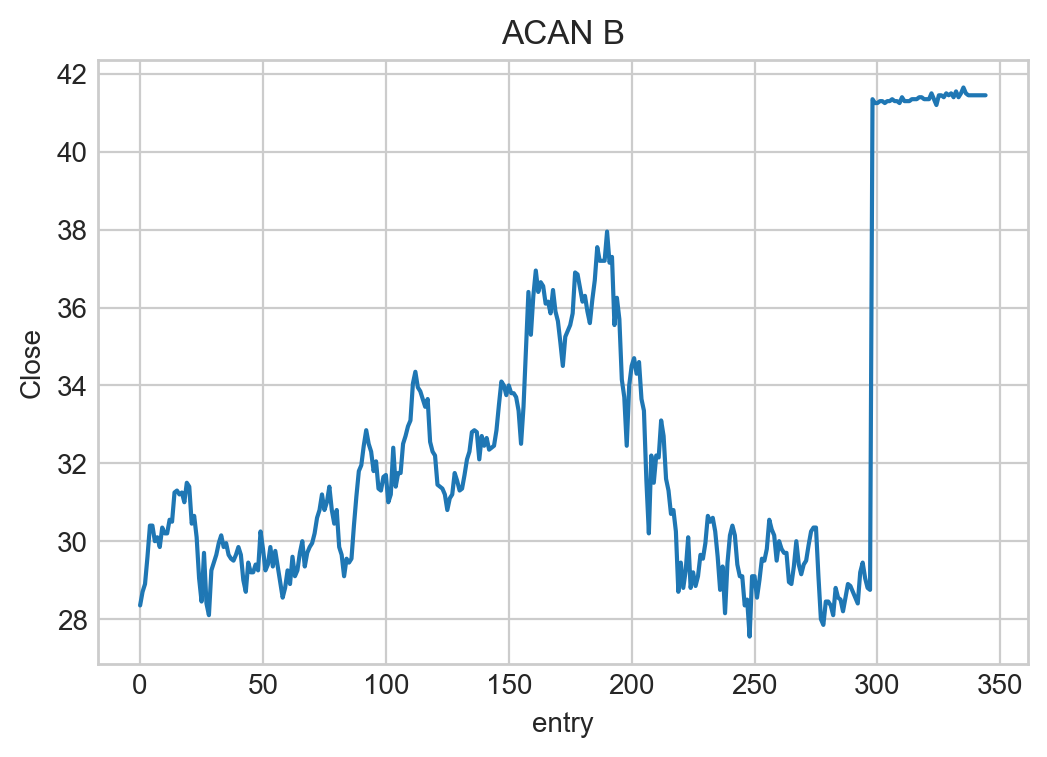

In [20]:
for instrument in instruments[:3]:
    ins_entries = bors_api.get_instrument_stock_price(instrument.insId, '2018-01-01', '2019-05-17')
    ins_pd = pd.DataFrame([entry.__dict__ for entry in ins_entries])
    
    plt.xlabel('entry')
    plt.ylabel('Close')
    plt.title(instrument.ticker)
    plt.plot(ins_pd['c'])
    plt.show()
